In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
%matplotlib inline

In [2]:
df = pd.read_csv("energy_statistics_UE_v3.csv")
df

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,category,commodity,transaction,wide_category
0,0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,Additives and Oxygenates,Exports,Oil
1,1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,Additives and Oxygenates,Exports,Oil
2,2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,Additives and Oxygenates,Exports,Oil
3,3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,Additives and Oxygenates,Exports,Oil
4,4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,Additives and Oxygenates,Exports,Oil
...,...,...,...,...,...,...,...,...,...,...
367879,1189431,United Kingdom,Electricity - total wind production,1994,"Kilowatt-hours, million",342.0,wind_electricity,Electricity,total wind production,Green
367880,1189432,United Kingdom,Electricity - total wind production,1993,"Kilowatt-hours, million",218.0,wind_electricity,Electricity,total wind production,Green
367881,1189433,United Kingdom,Electricity - total wind production,1992,"Kilowatt-hours, million",40.0,wind_electricity,Electricity,total wind production,Green
367882,1189434,United Kingdom,Electricity - total wind production,1991,"Kilowatt-hours, million",11.0,wind_electricity,Electricity,total wind production,Green


In [3]:
green = df[df["wide_category"] == "Green"]
green

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,category,commodity,transaction,wide_category
143580,490921,Austria,Electricity - total geothermal production,2014,"Kilowatt-hours, million",0.0,geothermal,Electricity,total geothermal production,Green
143581,490922,Austria,Electricity - total geothermal production,2013,"Kilowatt-hours, million",0.0,geothermal,Electricity,total geothermal production,Green
143582,490923,Austria,Electricity - total geothermal production,2012,"Kilowatt-hours, million",1.0,geothermal,Electricity,total geothermal production,Green
143583,490924,Austria,Electricity - total geothermal production,2011,"Kilowatt-hours, million",1.0,geothermal,Electricity,total geothermal production,Green
143584,490925,Austria,Electricity - total geothermal production,2010,"Kilowatt-hours, million",1.0,geothermal,Electricity,total geothermal production,Green
...,...,...,...,...,...,...,...,...,...,...
367879,1189431,United Kingdom,Electricity - total wind production,1994,"Kilowatt-hours, million",342.0,wind_electricity,Electricity,total wind production,Green
367880,1189432,United Kingdom,Electricity - total wind production,1993,"Kilowatt-hours, million",218.0,wind_electricity,Electricity,total wind production,Green
367881,1189433,United Kingdom,Electricity - total wind production,1992,"Kilowatt-hours, million",40.0,wind_electricity,Electricity,total wind production,Green
367882,1189434,United Kingdom,Electricity - total wind production,1991,"Kilowatt-hours, million",11.0,wind_electricity,Electricity,total wind production,Green


In [4]:
#wszystkie kategorie/transakcje są w tych samych jednostkach
print(green["unit"].unique())
print(green["transaction"].unique())
print(green["category"].unique())

['Kilowatt-hours, million']
['total geothermal production' 'total hydro production'
 'total solar production' 'total tide, wave production'
 'total wind production']
['geothermal' 'hydro' 'solar_electricity'
 'tide_wave_and_ocean_electricity' 'wind_electricity']


In [5]:
#suma wyprodukowanej zielonej energii (wszystkie kategorie) posortowana wg lat i krajów
grouped_green = green.groupby(by=["year","country_or_area"], as_index = False)
green_sum = pd.DataFrame(grouped_green["quantity"].sum())
green_sum

,year,country_or_area,quantity
0,1990,Austria,32507.0
1,1990,Belgium,904.0
2,1990,Bulgaria,1878.0
3,1990,Denmark,638.0
4,1990,Finland,10859.0
...,...,...,...
649,2014,Slovakia,5065.0
650,2014,Slovenia,6627.0
651,2014,Spain,108656.0
652,2014,Sweden,75153.0


In [6]:
#top 5 pod względem "quantity" w 2014 (czyli ostatnim okresie w próbie)
green_sum[green_sum["year"] == 2014].nlargest(5, "quantity")

,year,country_or_area,quantity
636,2014,Germany,118955.0
651,2014,Spain,108656.0
640,2014,Italy,103656.0
635,2014,France,92265.0
652,2014,Sweden,75153.0


In [7]:
#DF dla średniej z top 5 
#warunki
var_1 = green_sum["country_or_area"] == "Germany"
var_2 = green_sum["country_or_area"] == "Spain"
var_3 = green_sum["country_or_area"] == "Italy"
var_4 = green_sum["country_or_area"] == "France"
var_5 = green_sum["country_or_area"] == "Sweden"
#DF - wszystkie z top 5
top_5 = green_sum[var_1 | var_2 | var_3 | var_4 | var_5] 
#Groupby po roku ze średnią
top_5_grouped = top_5.groupby(by=["year"], as_index = False)
mean_top_5 = pd.DataFrame(top_5_grouped["quantity"].mean())

In [8]:
#suma energii wyprodukowana w konkretnych latach w podziale na kraje i kategorie
grouped_green_category = green.groupby(by=["year","country_or_area", "transaction"], as_index = False)
green_sum_cat = pd.DataFrame(grouped_green_category["quantity"].sum())
green_sum_cat

,year,country_or_area,transaction,quantity
0,1990,Austria,total hydro production,32507.0
1,1990,Belgium,total hydro production,897.0
2,1990,Belgium,total wind production,7.0
3,1990,Bulgaria,total hydro production,1878.0
4,1990,Denmark,total hydro production,28.0
...,...,...,...,...
1609,2014,Sweden,total wind production,11234.0
1610,2014,United Kingdom,total hydro production,8768.0
1611,2014,United Kingdom,total solar production,4050.0
1612,2014,United Kingdom,"total tide, wave production",2.0


In [9]:
#słownik opisów kategorii
category_descr = {"total geothermal production": "Geothermal energy is heat derived within the sub-surface of the earth. Water and/or steam carry the geothermal energy to the Earth's surface. Depending on its characteristics, geothermal energy can be used for heating and cooling purposes or be harnessed to generate clean electricity.",
                  "total hydro production": "Hydropower or water power is power derived from the energy of falling or fast-running water, which may be harnessed for useful purposes. Since ancient times, hydropower from many kinds of watermills has been used as a renewable energy source for irrigation and the operation of various mechanical devices. A trompe, which produces compressed air from falling water, is sometimes used to power other machinery at a distance.",
                  "total solar production": "Solar power is the conversion of energy from sunlight into electricity, either directly using photovoltaics, indirectly using concentrated solar power, or a combination. Concentrated solar power systems use lenses or mirrors and solar tracking systems to focus a large area of sunlight into a small beam. Photovoltaic cells convert light into an electric current using the photovoltaic effect.",
                  "total tide, wave production": "Tidal energy is a renewable energy powered by the natural rise and fall of ocean tides and currents. Some of these technologies include turbines and paddles. Tidal energy is produced by the surge of ocean waters during the rise and fall of tides.",
                  "total wind production": "Wind energy (or wind power) refers to the process of creating electricity using the wind, or air flows that occur naturally in the earth’s atmosphere. Modern wind turbines are used to capture kinetic energy from the wind and generate electricity."}

In [10]:
#widget
country_list = list(green_sum["country_or_area"].unique())
transaction_list = list(green["transaction"].unique())
choice_widget_country = widgets.Dropdown(options=country_list)
choice_widget_category = widgets.Dropdown(options=transaction_list)
values = {"Kraj": choice_widget_country.value, "Kategoria": choice_widget_category.value}
def widgets_handler(country_choice, category_choice):
    values["Kraj"] = country_choice
    values["Kategoria"] = category_choice

In [42]:
#wykres z sumą energii w totalu w danym kraju (wybranym z listy)
def plot_total():
    x = green_sum[green_sum["country_or_area"] == values["Kraj"]]
    plt.figure(figsize=(8, 6))
    plt.plot("year", "quantity", data=x, label = "total green energy produced by {}".format(values["Kraj"]))
    plt.plot("year", "quantity", data = mean_top_5, label = "total green energy produced by top 5 countries (mean)")
    plt.legend()
    plt.xlim(1990, 2015)
    plt.title(label = "green energy produced in {} in comparison with mean of top 5".format(values["Kraj"]))
    plt.show()

In [43]:
#wykres z sumą energii w danym kraju (wybranym z listy) i w wybranej kategorii (też z listy)
#dodatkowo drukuje opis wybranej kategorii
def plot_category():
    kraj = green_sum_cat["country_or_area"] == values["Kraj"]
    kategoria = green_sum_cat["transaction"] == values["Kategoria"]
    print("Description of the energy source:")
    for key, value in category_descr.items():
        if values["Kategoria"] == key:
            print(value)
    y = green_sum_cat[kraj & kategoria]
    plt.figure(figsize=(8, 6))
    plt.xlim(1990, 2015)
    plt.plot("year", "quantity", data=y)
    plt.title(label = "{} in {}".format(values["Kategoria"], values["Kraj"]))
    plt.show()

In [36]:
#wykres z totalem produkcji energii w danym kraju oraz udziałem poszczególnych
def plot_bar():
    kraj = green_sum_cat["country_or_area"] == values["Kraj"]
    kategoria = green_sum_cat["transaction"] == values["Kategoria"]
    z = green_sum_cat[kraj]
    z = z[["year", "transaction", "quantity"]]
    z_pivot = z.pivot(index = "year", columns = "transaction", values = "quantity")
    z_pivot = z_pivot.fillna(0)
    z_pivot.plot.bar(stacked = True)
    plt.title(label = "share of green energy sources in {}".format(values["Kraj"]))    
    plt.legend(title=None)
    plt.show()

In [37]:
#wykres z totalem produkcji energii w danym kraju oraz udziałem poszczególnych - stack 100%
def plot_bar_100():
    kraj = green_sum_cat["country_or_area"] == values["Kraj"]
    kategoria = green_sum_cat["transaction"] == values["Kategoria"]
    z = green_sum_cat[kraj]
    z = z[["year", "transaction", "quantity"]]
    z_pivot = z.pivot(index = "year", columns = "transaction", values = "quantity")
    z_pivot = z_pivot.fillna(0)
    z_pivot.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
    plt.title(label = "share of green energy sources in {}".format(values["Kraj"]))
    plt.legend(title=None)
    plt.show()

interactive(children=(Dropdown(description='country_choice', index=13, options=('Austria', 'Belgium', 'Bulgari…

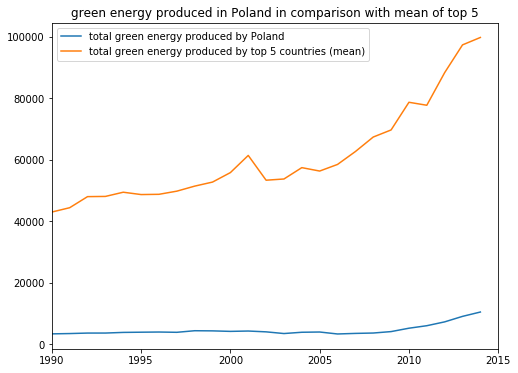

Description of the energy source:
Wind energy (or wind power) refers to the process of creating electricity using the wind, or air flows that occur naturally in the earth’s atmosphere. Modern wind turbines are used to capture kinetic energy from the wind and generate electricity.


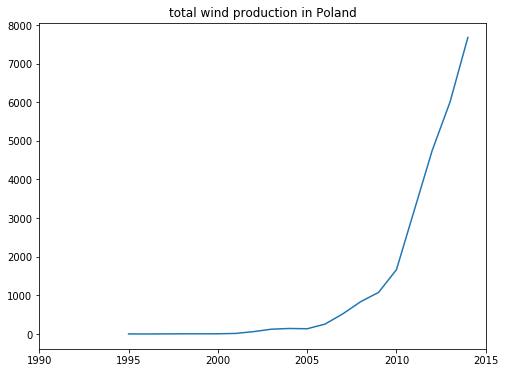

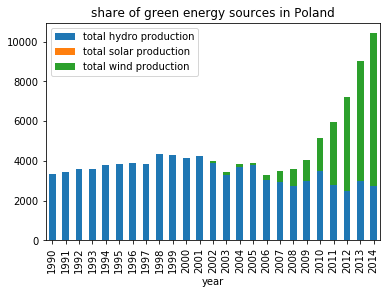

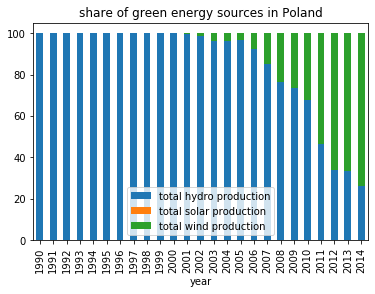

In [45]:
widgets.interact(widgets_handler, country_choice=choice_widget_country, category_choice = choice_widget_category)
plot_total()
plot_category()
plot_bar() #opcja 1
plot_bar_100() #opcja 2